<a href="https://www.kaggle.com/code/rickykyaw/human-or-not?scriptVersionId=217250067" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai icrawler --use-deprecated=legacy-resolver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.5/234.5 kB 5.6 MB/s eta 0:00:00


In [2]:
from icrawler import ImageDownloader
from icrawler.builtin import GoogleImageCrawler
from icrawler.builtin.google import GoogleFeeder, GoogleParser

class MyDownloader(ImageDownloader):
    def get_filename(self, task, default_ext):
        filename = super(MyDownloader, self).get_filename(task, default_ext)
        filename = filename.split(".")[0]
        return self.prefix + filename + ".png"

class MyCrawler(GoogleImageCrawler):
    def __init__(self, feeder_cls=GoogleFeeder, parser_cls=GoogleParser, downloader_cls=MyDownloader, prefix="", *args, **kwargs):
        super().__init__(feeder_cls, parser_cls, downloader_cls, *args, **kwargs)
        self.downloader.prefix = prefix

In [3]:
def search_images(term, max_images=30, folder_name="."):
    print(f"Searching for '{term}'")
    crawler = MyCrawler(
        prefix=term,
        storage={'root_dir': folder_name}, 
    )
    crawler.crawl(keyword=term, max_num=max_images)

In [4]:
from fastai.vision.all import *

In [5]:
no_of_photos = 20

searches = 'people', 'animals', 'trees'

path = Path('dataset')
from time import sleep

for o in searches:
    dest = (path/o)
    print(f'This is dest, {dest}')
    dest.mkdir(exist_ok=True, parents=True)
    search_images(f"{o} photo", no_of_photos, dest)
    sleep(10)
    print(f"Photos of {o} completed!")

resize_images(path, max_size=400, dest=path, recurse=True)
print(f"Photos resized!")

This is dest, dataset/people
Searching for 'people photo'
Photos of people completed!
This is dest, dataset/animals
Searching for 'animals photo'
Photos of animals completed!
This is dest, dataset/trees
Searching for 'trees photo'
Photos of trees completed!
Photos resized!


In [6]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

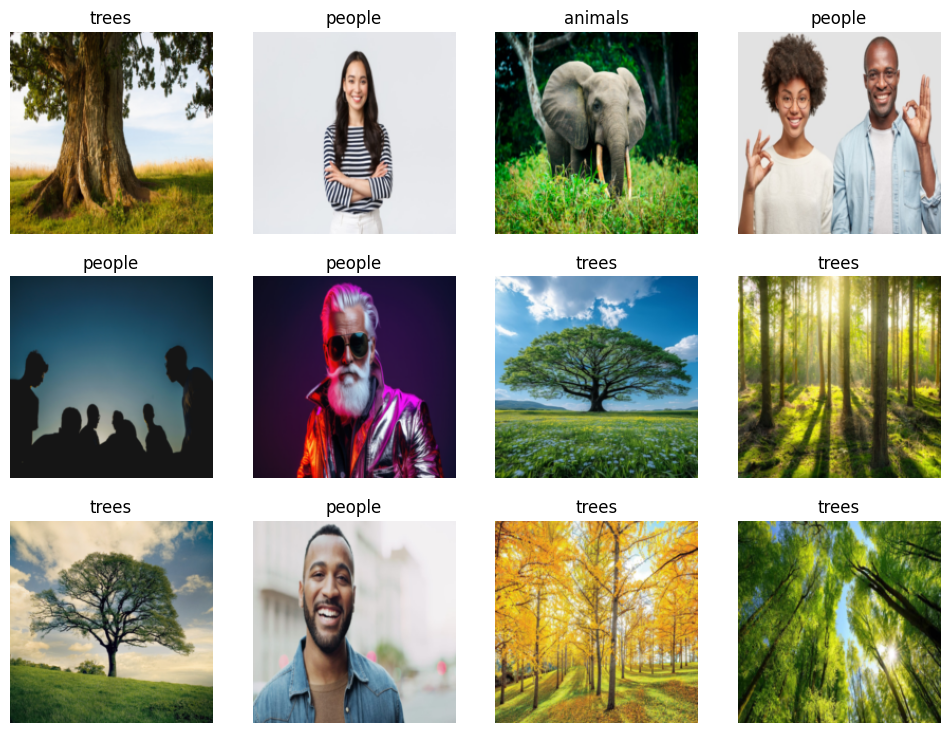

In [7]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=12)

In [8]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 167MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.117314,1.958560,0.500000,00:01


epoch,train_loss,valid_loss,error_rate,time
0,1.987281,1.519799,0.583333,00:00
1,1.676625,1.186174,0.500000,00:00
2,1.437126,0.767230,0.416667,00:00
3,1.192265,0.520996,0.250000,00:00
4,1.002121,0.382595,0.166667,00:00
5,0.860485,0.316076,0.083333,00:00
6,0.732076,0.266963,0.083333,00:00
7,0.635923,0.230545,0.083333,00:00
8,0.560610,0.212335,0.083333,00:00
9,0.500179,0.190985,0.083333,00:00


In [9]:
classes = list(learn.dls.vocab)

print(classes)

['animals', 'people', 'trees']


In [10]:
search_images('man', 1)

Searching for 'man'


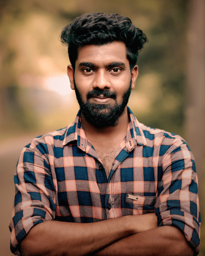

In [11]:
img = Image.open("man000001.png")
img.to_thumb(256,256)

In [12]:
predicted_class,_,probs = learn.predict(img)
print(f"This is an image of: {predicted_class}.")
predicted_idx = classes.index(predicted_class)
for idx, ele in enumerate(classes):
    print(f"Probability it's from {ele} category: {probs[idx]:.4f}")

This is an image of: people.
Probability it's from animals category: 0.1781
Probability it's from people category: 0.7658
Probability it's from trees category: 0.0561


In [13]:
search_images('lion', 1)

Searching for 'lion'


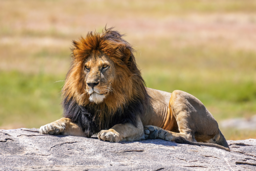

In [14]:
img = Image.open("lion000001.png")
img.to_thumb(256,256)

In [15]:
predicted_class,_,probs = learn.predict(img)
print(f"This is an image of: {predicted_class}.")
predicted_idx = classes.index(predicted_class)
for idx, ele in enumerate(classes):
    print(f"Probability it's from {ele} category: {probs[idx]:.4f}")

This is an image of: animals.
Probability it's from animals category: 0.9925
Probability it's from people category: 0.0071
Probability it's from trees category: 0.0004
